# 1.
Вы — аналитик «Королевства гномов», популярной онлайн-игры в жанре фэнтези.
Маркетологи просят проанализировать эффективность рекламы, направленной на привлечение новых пользователей.
Дата-инженеры подготовили для вас данные журнала сессий и пользовательских профилей.
Структура профилей, ch02_problems01_users.csv:

    user_id — уникальный идентификатор пользователя,
    first_ts — дата и время первого посещения,
    dt — дата первого посещения.

Структура журнала сессий, ch02_problems01_visits.csv:

    user_id — уникальный идентификатор пользователя,
    session_duration — длительность пользовательской сессии,
    session_start — дата и время начала посещения.

Начните с расчёта коэффициента удержания.
Загрузите профили и журнал сессий, приведите данные к нужным типам.
Узнайте самую раннюю и самую позднюю даты первого посещения, существующие в пользовательских профилях.
Самую раннюю сохраните в переменной min_analysis_date, а самую позднюю — в observation_date. Самая поздняя дата будет моментом анализа.
Задайте горизонт анализа — 14 дней.
Определите максимально возможную для такого горизонта дату привлечения и сохраните её в переменной max_analysis_date.

Подсказка
Вызовите функцию to_datetime(), чтобы привести данные столбцов dt, first_ts из users и session_start из visits к типу datetime.
К преобразованному столбцу dt дополнительно примените атрибут dt.date, чтобы получить дату.
Получите самую позднюю дату посещения, записанную в пользовательских профилях, вызвав метод max() к столбцу dt из датафрейма users.
Узнайте максимально возможную дату привлечения, вычтя из observation_date временной промежуток, равный горизонту анализа.
Получите этот временной промежуток, вызвав функцию timedelta() и передав ей параметр days, равный analysis_horizon минус 1.

In [2]:
import pandas as pd
from datetime import datetime, timedelta

users = pd.read_csv('datasets/ch02_problems01_users.csv')  # профили
visits = pd.read_csv('datasets/ch02_problems01_visits.csv')  # сессии

# преобразуйте данные о времени
users['dt'] =  pd.to_datetime(users['dt']).dt.date# ваш код здесь
users['first_ts'] =  pd.to_datetime(users['first_ts'])# ваш код здесь
visits['session_start'] =  pd.to_datetime(visits['session_start'])# ваш код здесь

# определите доступный интервал привлечения пользователей
min_analysis_date = users['dt'].min()
observation_date =  users['dt'].max()# ваш код здесь

print(min_analysis_date, observation_date)

# задайте горизонт анализа и посчитайте максимальную дату привлечения
analysis_horizon = 14# ваш код здесь
max_analysis_date =  observation_date - timedelta(days=analysis_horizon - 1)# ваш код здесь

print(max_analysis_date)

2020-07-11 2020-08-10
2020-07-28


# 2.
Вычислите размеры когорт игроков, привлечённых в каждый из дней до максимально возможной даты: от min_analysis_date до max_analysis_date.
Постройте график, отражающий динамику привлечения пользователей в этот период.
Рассчитайте средний размер когорты и сохраните результат в переменной mean_daily_cohort_size.
Приведите её к типу int и выведите на экран.

Подсказка
Чтобы рассчитать размеры когорт, сделайте срез пользовательских профилей методом query(): значение dt должно быть больше или равно @min_analysis_date и меньше или равно @max_analysis_date.
Сгруппируйте данные по столбцу dt и примените функцию nunique к столбцу user_id.
Постройте график методом plot().
Передайте ему значение True в качестве параметра grid — так на графике появится сетка.
Чтобы узнать средний размер когорты, вызовите метод mean() к данным report.
Приведите результат к типу int методом astype() и выведите на экран.

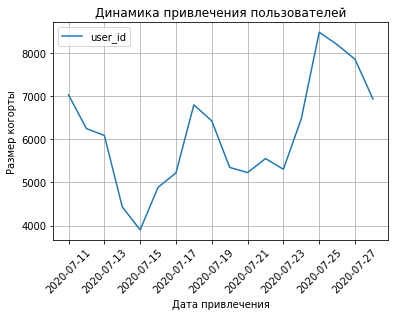

user_id    6132
dtype: int64


In [10]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

users = pd.read_csv('datasets/ch02_problems01_users.csv')  # профили
visits = pd.read_csv('datasets/ch02_problems01_visits.csv')  # сессии

# преобразование данных о времени
users['dt'] = pd.to_datetime(users['dt']).dt.date
users['first_ts'] = pd.to_datetime(users['first_ts'])
visits['session_start'] = pd.to_datetime(visits['session_start'])

# доступный интервал привлечения пользователей
min_analysis_date = users['dt'].min()
observation_date = users['dt'].max()

# горизонт анализа
analysis_horizon = 14
# максимально возможная дата привлечения с учётом горизонта
max_analysis_date = observation_date - timedelta(days=analysis_horizon - 1)

# рассчитайте размеры когорт
report = (
    users.query('@max_analysis_date >= dt and dt >= @min_analysis_date')  # допишите код
        .groupby('dt')  # допишите код
        .agg({'user_id':'nunique'})  # допишите код
)

report.plot(grid=True)  # постройте график, добавьте сетку
plt.title('Динамика привлечения пользователей')  # название графика
plt.xlabel('Дата привлечения')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Размер когорты')   # название оси Y
plt.show()

# посчитайте средний размер когорты
mean_daily_cohort_size = report.mean()# ваш код здесь
print(mean_daily_cohort_size.astype('int'))
# выведите средний размер когорты в виде целого числа

# 3.
Оцените качество привлечённых пользователей: постройте таблицу удержания.
Для этого вызовите функцию get_retention(), передав ей пользовательские профили, сессии, момент и горизонт анализа данных.
Сырые данные сохраните в переменной retention_raw, а таблицу удержания — в retention.
Выведите таблицу удержания на экран.

Подсказка
Вызовите функцию get_retention(), передав ей в качестве аргументов переменные users, visits, observation_date и analysis_horizon.

In [13]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


def get_retention(
        profiles, sessions, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
            result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
        ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped


users = pd.read_csv('datasets/ch02_problems01_users.csv')  # профили
visits = pd.read_csv('datasets/ch02_problems01_visits.csv')  # сессии

# преобразование данных о времени
users['dt'] = pd.to_datetime(users['dt']).dt.date
users['first_ts'] = pd.to_datetime(users['first_ts'])
visits['session_start'] = pd.to_datetime(visits['session_start'])

# доступный интервал привлечения пользователей
min_analysis_date = users['dt'].min()
observation_date = users['dt'].max()  # момент анализа

# горизонт анализа
analysis_horizon = 14

# постройте таблицу удержания
retention_raw, retention = get_retention(profiles=users, sessions=visits, observation_date=observation_date, horizon_days=analysis_horizon)# ваш код здесь
print(retention)
# выведите retention на экран

            cohort_size    0         1         2         3         4  \
dt                                                                     
2020-07-11         7027  1.0  0.284047  0.185428  0.129216  0.105023   
2020-07-12         6245  1.0  0.282946  0.185268  0.135468  0.101521   
2020-07-13         6087  1.0  0.284377  0.181370  0.130935  0.102021   
2020-07-14         4435  1.0  0.289966  0.173844  0.128749  0.109357   
2020-07-15         3901  1.0  0.313766  0.201999  0.161753  0.127916   
2020-07-16         4887  1.0  0.307551  0.216902  0.145693  0.121752   
2020-07-17         5221  1.0  0.306646  0.211262  0.158207  0.121241   
2020-07-18         6796  1.0  0.344173  0.233225  0.180842  0.146115   
2020-07-19         6424  1.0  0.329078  0.233811  0.181507  0.145081   
2020-07-20         5347  1.0  0.334393  0.225734  0.174303  0.144567   
2020-07-21         5228  1.0  0.308340  0.201033  0.154552  0.126052   
2020-07-22         5552  1.0  0.297370  0.197406  0.148595  0.12